In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [583]:
train_ft = pd.read_csv('./training_set_features.csv')
test_ft = pd.read_csv('./test_set_features.csv')
train_lbl = pd.read_csv('training_set_labels.csv')
submit_fmt = pd.read_csv('submission_format.csv')

In [585]:
train_ft.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [587]:
#no meaningful info in columns 'hhs_geo_region', 'employment_industry','employment_occupation' -  remove
train_ft.drop(columns=['hhs_geo_region', 'employment_industry', 'employment_occupation'], inplace=True)
test_ft.drop(columns=['hhs_geo_region', 'employment_industry', 'employment_occupation'], inplace=True)

In [589]:
#lets do some categorization of columns:
num_cols = ['xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
      'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 
        'household_adults', 'household_children']
obj_cols = ['age_group','education', 'race', 'sex', 'income_poverty', 
            'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

In [591]:
train_ft.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [593]:
# too many missing in health-insurance col - delete it
train_ft.drop(columns=['health_insurance'], inplace=True)
test_ft.drop(columns=['health_insurance'], inplace=True)

In [595]:
#handling other missing values:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cols_to_mode_impute = ['education', 'income_poverty', 'employment_status', 
                       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
                       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
                        'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
train_ft[cols_to_mode_impute] = imputer.fit_transform(train_ft[cols_to_mode_impute])
test_ft[cols_to_mode_impute] = imputer.fit_transform(test_ft[cols_to_mode_impute])

In [597]:
cols_with_less_null = []
for col in train_ft.columns:
    if train_ft[col].isna().sum() < 300:
        cols_with_less_null.append(col)

cols_with_less_null

['respondent_id',
 'xyz_concern',
 'xyz_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'opinion_xyz_vacc_effective',
 'opinion_xyz_risk',
 'opinion_xyz_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'employment_status',
 'census_msa',
 'household_adults',
 'household_children']

In [599]:
# #now lets remove the rows when columns have less than 300 missing values:
# cols_with_less_null = []
# for col in train_ft.columns:
#     if train_ft[col].isna().sum() < 300:
#         cols_with_less_null.append(col)

# train_ft.dropna(subset=cols_with_less_null, inplace=True)
# test_ft.dropna(subset=cols_with_less_null, inplace=True) ------------ wrong, so removed

In [601]:
#lets perform mode imputation on other parameters also:
more_cols_modeimpute = ['doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'xyz_concern',
 'xyz_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'opinion_xyz_vacc_effective',
 'opinion_xyz_risk',
 'opinion_xyz_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'employment_status',
 'census_msa',]
train_ft.loc[:, more_cols_modeimpute] = imputer.fit_transform(train_ft.loc[:, more_cols_modeimpute])
test_ft.loc[:, more_cols_modeimpute] = imputer.fit_transform(test_ft.loc[:, more_cols_modeimpute])

In [602]:
#lets feature encode sex, marital_status and rent_or_own rn for convinience
train_ft.loc[:,'marital_status'] = train_ft.loc[:,'marital_status'].apply(lambda x: 1 if x == 'Married' else 0)
train_ft.loc[:, 'rent_or_own'] = train_ft.loc[:, 'rent_or_own'].apply(lambda x: 1 if x == 'Own' else 0)
train_ft.loc[:, 'sex'] = train_ft.loc[:, 'sex'].apply(lambda x: 1 if x == 'Male' else 0)
train_ft['marital_status'] = train_ft['marital_status'].astype(int)
train_ft['rent_or_own'] = train_ft['rent_or_own'].astype(int)
train_ft['sex'] = train_ft['sex'].astype(int)

test_ft.loc[:,'marital_status'] = test_ft.loc[:,'marital_status'].apply(lambda x: 1 if x == 'Married' else 0)
test_ft.loc[:, 'rent_or_own'] = test_ft.loc[:, 'rent_or_own'].apply(lambda x: 1 if x == 'Own' else 0)
test_ft.loc[:, 'sex'] = test_ft.loc[:, 'sex'].apply(lambda x: 1 if x == 'Male' else 0)
test_ft['marital_status'] = test_ft['marital_status'].astype(int)
test_ft['rent_or_own'] = test_ft['rent_or_own'].astype(int)
test_ft['sex'] = test_ft['sex'].astype(int)

In [605]:
cols_median_impute = ['household_adults', 'household_children']
imputer = SimpleImputer(strategy='median')
train_ft.loc[:, cols_median_impute] = imputer.fit_transform(train_ft.loc[:, cols_median_impute])
test_ft.loc[:, cols_median_impute] = imputer.fit_transform(test_ft.loc[:, cols_median_impute])

In [607]:
test_ft.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_

### Feature encoding & Normalizing

In [610]:
nominal_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker', 
        'marital_status', 'rent_or_own', 'sex']
ordinal_cols = ['xyz_concern', 'xyz_knowledge', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
categorical_cols = ['age_group', 'education', 'race', 'income_poverty', 
                    'employment_status', 'census_msa']
numerical_cols = ['household_adults', 'household_children']

In [612]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_ft[ordinal_cols + numerical_cols] = scaler.fit_transform(train_ft[ordinal_cols + numerical_cols])
train_ft = pd.get_dummies(train_ft, columns=categorical_cols, drop_first=True)

test_ft[ordinal_cols + numerical_cols] = scaler.fit_transform(test_ft[ordinal_cols + numerical_cols])
test_ft = pd.get_dummies(test_ft, columns=categorical_cols, drop_first=True)

In [614]:
# ordinal_encoding = {val: idx for idx, val in enumerate(sorted(train_ft['age_group'].unique()))}
# train_ft['age_group'] = train_ft['age_group'].map(ordinal_encoding)

# ordinal_encoding_2 = {val: idx for idx, val in enumerate(sorted(test_ft['age_group'].unique()))}
# test_ft['age_group'] = test_ft['age_group'].map(ordinal_encoding_2)

In [616]:
# unique_values_sorted_education = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
# ordinal_encoding = {val: idx for idx, val in enumerate(unique_values_sorted_education)}
# train_ft['education'] = train_ft['education'].map(ordinal_encoding)

# unique_values_sorted_education_2 = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
# ordinal_encoding_2 = {val: idx for idx, val in enumerate(unique_values_sorted_education_2)}
# test_ft['education'] = test_ft['education'].map(ordinal_encoding)

In [618]:
# unique_values_sorted_poverty = ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
# ordinal_encoding = {val: idx for idx, val in enumerate(unique_values_sorted_poverty)}
# train_ft['income_poverty'] = train_ft['income_poverty'].map(ordinal_encoding)

# ordinal_encoding_2 = {val: idx for idx, val in enumerate(unique_values_sorted_poverty)}
# test_ft['income_poverty'] = test_ft['income_poverty'].map(ordinal_encoding_2)

In [620]:
# unique_values_race = ['White', 'Black', 'Other or Multiple', 'Hispanic']
# ordinal_encoding = {val: idx for idx, val in enumerate(unique_values_race)}
# train_ft['race'] = train_ft['race'].map(ordinal_encoding)

# ordinal_encoding_2 = {val: idx for idx, val in enumerate(unique_values_race)}
# test_ft['race'] = test_ft['race'].map(ordinal_encoding_2)

In [622]:
# unique_values_emp = ['Not in Labor Force', 'Employed', 'Unemployed']
# ordinal_encoding = {val: idx for idx, val in enumerate(unique_values_emp)}
# train_ft['employment_status'] = train_ft['employment_status'].map(ordinal_encoding)

# ordinal_encoding_2 = {val: idx for idx, val in enumerate(unique_values_emp)}
# test_ft['employment_status'] = test_ft['employment_status'].map(ordinal_encoding_2)

In [624]:
# unique_values_msa = ['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City']
# ordinal_encoding = {val: idx for idx, val in enumerate(unique_values_msa)}
# train_ft['census_msa'] = train_ft['census_msa'].map(ordinal_encoding)

# ordinal_encoding_2 = {val: idx for idx, val in enumerate(unique_values_msa)}
# test_ft['census_msa'] = test_ft['census_msa'].map(ordinal_encoding_2)

### Feature engineering - using PCA for dimensionality reduction

In [627]:
train_ft.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex',
       'marital_status', 'rent_or_own', 'household_adults',
       'household_children', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'income_poverty_> $75,000',
       'income_poverty_Below Poverty',

In [629]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score

In [631]:
train_ft.shape

(26707, 42)

In [633]:
train_lbl.shape

(26707, 3)

In [635]:
missing_ids = set(train_lbl['respondent_id']) - set(train_ft['respondent_id'])
train_lbl = train_lbl[~train_lbl['respondent_id'].isin(missing_ids)]

In [637]:
test_ft.shape

(26708, 42)

In [639]:
submit_fmt.shape

(26708, 3)

In [641]:
missing_ids = set(submit_fmt['respondent_id']) - set(test_ft['respondent_id'])
submit_fmt = submit_fmt[~submit_fmt['respondent_id'].isin(missing_ids)]

In [643]:
train_ft.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex',
       'marital_status', 'rent_or_own', 'household_adults',
       'household_children', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'income_poverty_> $75,000',
       'income_poverty_Below Poverty',

In [645]:
#dropping this col coz it's annoying while modelling
train_ft.drop(columns=['respondent_id'], inplace=True)
train_lbl.drop(columns=['respondent_id'], inplace=True)

test_ft.drop(columns=['respondent_id'], inplace=True)
submit_fmt.drop(columns=['respondent_id'], inplace=True)

### Model Building

In [648]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(train_ft[train_ft.columns], train_lbl, test_size=0.2, random_state=42)

In [650]:
# Define the pipeline with Logistic Regression
pipeline = Pipeline(steps=[
                            ('scaler', StandardScaler()),
                            ('pca', PCA(n_components=0.95)),  # Adjust n_components to keep 95% of variance
                            ('classifier', MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42)))
                           ])

In [652]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                    random_state=42)))])

In [654]:
y_pred_val = pipeline.predict_proba(X_val)

##### -----------personal verification - not process------------------------------

In [657]:
y_val.head()

,xyz_vaccine,seasonal_vaccine
15772,0,0
9407,0,1
16515,0,0
23353,0,0
10008,0,0


In [659]:
print("Predicted probabilities for validation set:")
print("xyz_vaccine:")
print(y_pred_val[0][:5])  # Print first 5 samples' probabilities for xyz_vaccine
print("\nseasonal_vaccine:")
print(y_pred_val[1][:5])

Predicted probabilities for validation set:
xyz_vaccine:
[[0.90627434 0.09372566]
 [0.93287131 0.06712869]
 [0.89563013 0.10436987]
 [0.83114938 0.16885062]
 [0.84523929 0.15476071]]

seasonal_vaccine:
[[0.7408011  0.2591989 ]
 [0.87170297 0.12829703]
 [0.30315315 0.69684685]
 [0.78746893 0.21253107]
 [0.73942229 0.26057771]]


In [661]:
y_pred_val

[array([[0.90627434, 0.09372566],
        [0.93287131, 0.06712869],
        [0.89563013, 0.10436987],
        ...,
        [0.47486423, 0.52513577],
        [0.725149  , 0.274851  ],
        [0.83455043, 0.16544957]]),
 array([[0.7408011 , 0.2591989 ],
        [0.87170297, 0.12829703],
        [0.30315315, 0.69684685],
        ...,
        [0.45270894, 0.54729106],
        [0.52829155, 0.47170845],
        [0.3783259 , 0.6216741 ]])]

In [663]:
y_val.head(30)

,xyz_vaccine,seasonal_vaccine
15772,0,0
9407,0,1
16515,0,0
23353,0,0
10008,0,0
11635,1,1
19331,0,1
10221,1,1
23327,0,0
16569,1,1


In [665]:
def round_to_binary(arr):
    return np.round(arr).astype(int)

rounded_arrays = [round_to_binary(arr) for arr in y_pred_val]

array1 = rounded_arrays[0]
array2 = rounded_arrays[1]

array1_new = np.zeros(array1.shape[0], dtype=int)
for i in range(array1.shape[0]):
    max_index = np.argmax(array1[i])
    array1_new[i] = max_index

array2_new = np.zeros(array2.shape[0], dtype=int)
for i in range(array2.shape[0]):
    max_index = np.argmax(array2[i])
    array2_new[i] = max_index

# lol should have used only probability of being 1
    #why complicate T_T

In [667]:
from sklearn.metrics import accuracy_score
df_column = y_val['xyz_vaccine'].values[:5352]
accuracy_xyz= accuracy_score(array1_new.flatten(), df_column)
accuracy_xyz

0.83508049419693

In [669]:
df_column2 = y_val['seasonal_vaccine'].values[:5352]
accuracy_seas= accuracy_score(array2_new.flatten(), df_column2)
accuracy_seas

0.7744290527892175

##### Good enough accuarcy

##### -------------------------------------------------------------------------------------

In [673]:
from sklearn.metrics import roc_curve, auc

In [675]:
#ROC for both target variables
roc_auc_xyz = roc_auc_score(y_val['xyz_vaccine'], y_pred_val[0][:, 1])
roc_auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], y_pred_val[1][:, 1])

In [677]:
#roc curve and area for xyz_vaccine
fpr_xyz, tpr_xyz, _ = roc_curve(y_val['xyz_vaccine'], y_pred_val[0][:, 1])
roc_auc_xyz = auc(fpr_xyz, tpr_xyz)

In [679]:
#roc curve and area for seasonal_vaccine
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_val['seasonal_vaccine'], y_pred_val[1][:, 1])
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

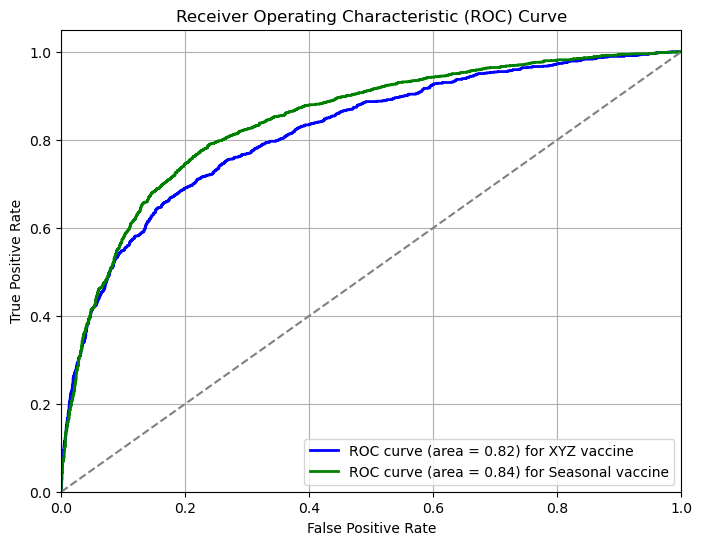

In [681]:
# plotting ROC graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_xyz, tpr_xyz, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xyz:.2f}) for XYZ vaccine')
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f}) for Seasonal vaccine')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [683]:
#lets train the model on the full training dataset for better accuracy or whatever
pipeline.fit(train_ft[train_ft.columns], train_lbl)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                    random_state=42)))])

### Using on Test Dataset

In [686]:
test_preds = pipeline.predict_proba(test_ft[test_ft.columns])

In [688]:
test_preds #checking

[array([[0.91574217, 0.08425783],
        [0.93898384, 0.06101616],
        [0.5610255 , 0.4389745 ],
        ...,
        [0.84913165, 0.15086835],
        [0.95678656, 0.04321344],
        [0.69932329, 0.30067671]]),
 array([[0.75182436, 0.24817564],
        [0.92728956, 0.07271044],
        [0.28075335, 0.71924665],
        ...,
        [0.73597993, 0.26402007],
        [0.63857051, 0.36142949],
        [0.38419929, 0.61580071]])]

In [690]:
test_preds[0][:, 1] #checking

array([0.08425783, 0.06101616, 0.4389745 , ..., 0.15086835, 0.04321344,
       0.30067671])

In [692]:
test_preds[1][:, 1] #checking

array([0.24817564, 0.07271044, 0.71924665, ..., 0.26402007, 0.36142949,
       0.61580071])

In [694]:
submit_fmt['h1n1_vaccine'] = test_preds[0][:, 1]
submit_fmt['seasonal_vaccine'] = test_preds[1][:, 1]

In [696]:
submit_fmt_2 = pd.read_csv('submission_format.csv') #checking

In [698]:
submit_fmt.shape #checking

(26708, 2)

In [700]:
submit_fmt.head() #checking

,h1n1_vaccine,seasonal_vaccine
0,0.084258,0.248176
1,0.061016,0.072710
2,0.438975,0.719247
3,0.425760,0.903814
4,0.232410,0.436761


In [702]:
submit_fmt_2.shape #checking

(26708, 3)

In [704]:
submit_fmt_2.head() #checking

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [706]:
submit_fmt_2['h1n1_vaccine'] = submit_fmt['h1n1_vaccine']
submit_fmt_2['seasonal_vaccine'] = submit_fmt['seasonal_vaccine']

In [708]:
submit_fmt_2.head() #checking

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.084258,0.248176
1,26708,0.061016,0.072710
2,26709,0.438975,0.719247
3,26710,0.425760,0.903814
4,26711,0.232410,0.436761


In [710]:
submit_fmt_2.info() #checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     26708 non-null  int64  
 1   h1n1_vaccine      26708 non-null  float64
 2   seasonal_vaccine  26708 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 626.1 KB


In [712]:
submit_fmt_2.isna().sum() #checking

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [714]:
submit_fmt_2.rename(columns={'h1n1_vaccine': 'xyz_vaccine'}, inplace=True)

In [716]:
submit_fmt_2.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.084258,0.248176
1,26708,0.061016,0.072710
2,26709,0.438975,0.719247
3,26710,0.425760,0.903814
4,26711,0.232410,0.436761


In [718]:
submit_fmt_2.to_csv('probabilities_submission_file.csv', index=False)

##### DONE :'D